<a href="https://colab.research.google.com/github/saasha2926/ML-Projects-/blob/main/ProstateCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('prostate.csv')
df.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [3]:
df.shape

(97, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   lcp      97 non-null     float64
 5   gleason  97 non-null     int64  
 6   pgg45    97 non-null     int64  
 7   lpsa     97 non-null     float64
 8   Target   97 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Target',axis = 1))
scaled_feat = scaler.transform(df.drop('Target',axis = 1))


In [7]:
df_feat = pd.DataFrame(scaled_feat,columns = df.columns[:-1])
df_feat.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


In [8]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train,x_test,y_train,y_test = train_test_split(scaled_feat,df['Target'],test_size = 0.30)


In [11]:
#here we are picking the value of k as 1

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[24  3]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.40      0.67      0.50         3

    accuracy                           0.87        30
   macro avg       0.68      0.78      0.71        30
weighted avg       0.90      0.87      0.88        30



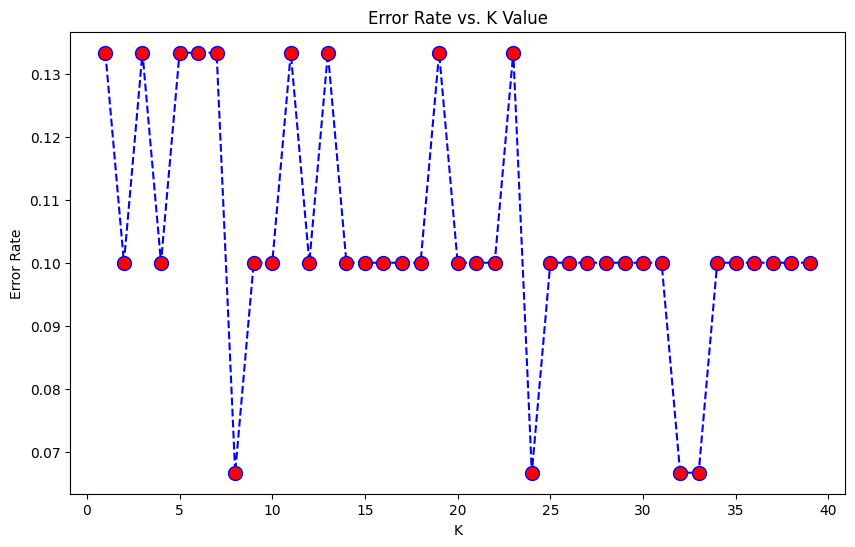

In [15]:
#elbow method to find optimal k value
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(x_train, y_train)
	pred_i = knn.predict(x_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()



In [17]:
#choosing k = 15 becuase it has less error rate and also odd  and small number
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[25  2]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.50      0.67      0.57         3

    accuracy                           0.90        30
   macro avg       0.73      0.80      0.76        30
weighted avg       0.92      0.90      0.91        30

